# Padding and Stride

Since the convolution kernel has a height and width, it cannot be effectively applied to the whole image without additional steps. This would mean that after applying several consecutive convolutions, we would repeatedly reduce the size of our image, each time removing information at the edges of the image. 

**Padding** is the most popular tool for maintaining the resolution of an image. **stride** may be used when we want to effectively reduce the resolution of an input image.

In [1]:
import torch
from torch import nn

## Padding

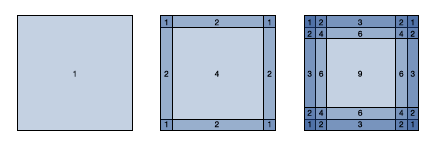

^ Pixel utilisations for kernels of size 1, 2 and 3. Note that the pixels in the coreners are hardly used. 

Since we typically use small kernels, this may not be a major issue all the time, but it can add up. One straightforward way of dealing with this is to add pixels to the outer edge of the images, and just set those values to zero. If we add $p_h$ and $p_w$ pixels to the height and width (roughly half on either end) we will end up with an output shape of $(n_h - k_h + p_h + 1) \times (n_w - k_w + p_w + 1)$, typically we will want to set the padding to be $p_h = k_h - 1$ and $p_w = k_w -1$ respectively, as this will give the inputs and outputs of the tensors the same values. 

Because of the fact that we wish to pad evenly on the top and the bototm, CNN kernels often have odd dimensions, so that the result of $p_h = (k_h - 1)/2$ and $p_w = (k_w - 1)/2$ is even, so padding can be evenly applied to the top and bottom, retaining the dimensions of the image. 

Furthermore, it's beneficial to choose a CNN kernel with odd dimensions, becasue then for any two-dimensional tensor X, we know that the output $Y[i, j]$ for any cross-correlation is calculated with the kernel window centered on $X[i, j]$. If the dimensions of X are even, then this will be off-center. 

In [6]:
def comp_conv2d(conv2d, X):
    X = X.reshape((1, 1) + X.shape) # Channels and exmaple dimensions 1
    Y = conv2d(X)
    return Y.reshape(Y.shape[2:]) # drop channel adn example dimensions

In [9]:
# Kernel size 3, so pad with (3 - 1) / 2 = 1.
conv2d = nn.LazyConv2d(out_channels=1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
print(comp_conv2d(conv2d, X).shape)

# Kernel size (5, 3) so pad with (5 - 1) / 2 = 2 and 1
conv2d = nn.LazyConv2d(out_channels=1, kernel_size=(5, 3), padding=(2, 1))
X = torch.rand(size=(8, 8))
print(comp_conv2d(conv2d, X).shape)


torch.Size([8, 8])
torch.Size([8, 8])


## Stride

In the examples so far, we have slid the convolution window one element at a time over the input image, but this doesn't necessarily have to be the case, we may wish to move it by a greater number of elements either for computational efficiency or for image downsampling. if the kernel is large, it also avoids redundancy as the kernel will cover a large area of the image.

The number of rows or columns traversed is called the _stride_. 

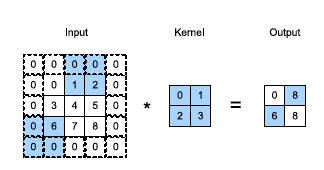
^ Cross-correlation operation for stride of 2 horizontally and 3 vertically. 

In general, for stride $s_h$ and $s_w$ for height and width respectively, the output shape is 

$$ (n_h - k_h + p_h + 1) / s_h \times (n_w - k_w + p_w + 1) / s_w $$

Assuming the padding is set to keep the dimensions the same, we can simplify to 

$$ (n_h / s_h) \times (n_w / s_w) $$


In [12]:
# Downsample with stride 2, with padding set to otherwise keep the image the same zie.
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

- padding can be used to increase the height and widith of the input to keep the outputs the same dimensions
- stride is how far we move a convolution across an image, it can reduce the resolution of the output